In [5]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from xarray import DataArray
import pandas as pd
from PyEMD import EEMD
import pylab as plt

In [2]:
data = np.load("/work/uo1075/u241321/data/slheat_budget_Norw_wt.npy")  # tendency; heat flux; ocean convergence
# Assign EEMD to `eemd` variable
S = data[1,:]   # tendency 
t = np.arange(1970,2019,1)

# EEMD options
max_imf=3
# Prepare and run EEMD
eemd = EEMD(trials=10000, FIXE_H=10, DTYPE=np.float16, noise_width=0.2, parallel=True)   #max_imfs=10)
eemd.noise_seed(6021)

# Execute EEMD on S
eIMFs = eemd.eemd(S, t, max_imf)
nIMFs = eIMFs.shape[0]

imfs, residue = eemd.get_imfs_and_residue() # imfs: same as eIMFs; residue = input - np.sum(eIMFs, axis=0)

# Whitenoise statistical significance test.
# Performs whitenoise test as described by Wu & Huang [Wu2004].
from PyEMD.checks import whitenoise_check
significant_imfs = whitenoise_check(eIMFs, test_name='apriori', alpha=0.99)
significant_imfs   # {1: 1, 2: 1, 3: 1, 4: 0}


{1: 1, 2: 1, 3: 1, 4: 1}

In [3]:
eemd_assi = np.zeros((5,49))  #  raw input data;  c1-c4
eemd_assi [0,:] = S
eemd_assi [1::,:] = eIMFs

np.save("/work/uo1075/u241321/data/eemd_slheat_Norwegian_wt", eemd_assi)

In [5]:

# np.save("/work/uo1075/u241321/data/eemd_t310_h_ly2-5_Norwegian", eemd_h)

In [6]:
assi = np.load("/work/uo1075/u241321/data/eemd_slheat_Norwegian_wt.npy")
# hind = np.load("/work/uo1075/u241321/data/eemd_t310_h_ly2-5_Norwegian.npy")

# assi = eemd_assi
# hind = eemd_h

In [10]:
np.corrcoef(assi[0,:], hind[0,:])[0,1]

0.16327310689612912

In [11]:
np.corrcoef(assi[1,:], hind[1,:])[0,1]

0.3050768648431856

In [12]:
np.corrcoef(assi[2,:], hind[2,:])[0,1]

0.30299120278802344

In [13]:
np.corrcoef(assi[3,:], hind[3,:])[0,1]

0.304587422172017

In [14]:
np.corrcoef(assi[4,:], hind[4,:])[0,1]

-0.316539605344328

/tmp/ipykernel_2469594/2165890632.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(y)
/tmp/ipykernel_2469594/2165890632.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(y)
/tmp/ipykernel_2469594/2165890632.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_yticklabels(y)
/tmp/ipykernel_2469594/2165890632.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3].set_yticklabels(y)
/tmp/ipykernel_2469594/2165890632.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[4].set_yticklabels(y)


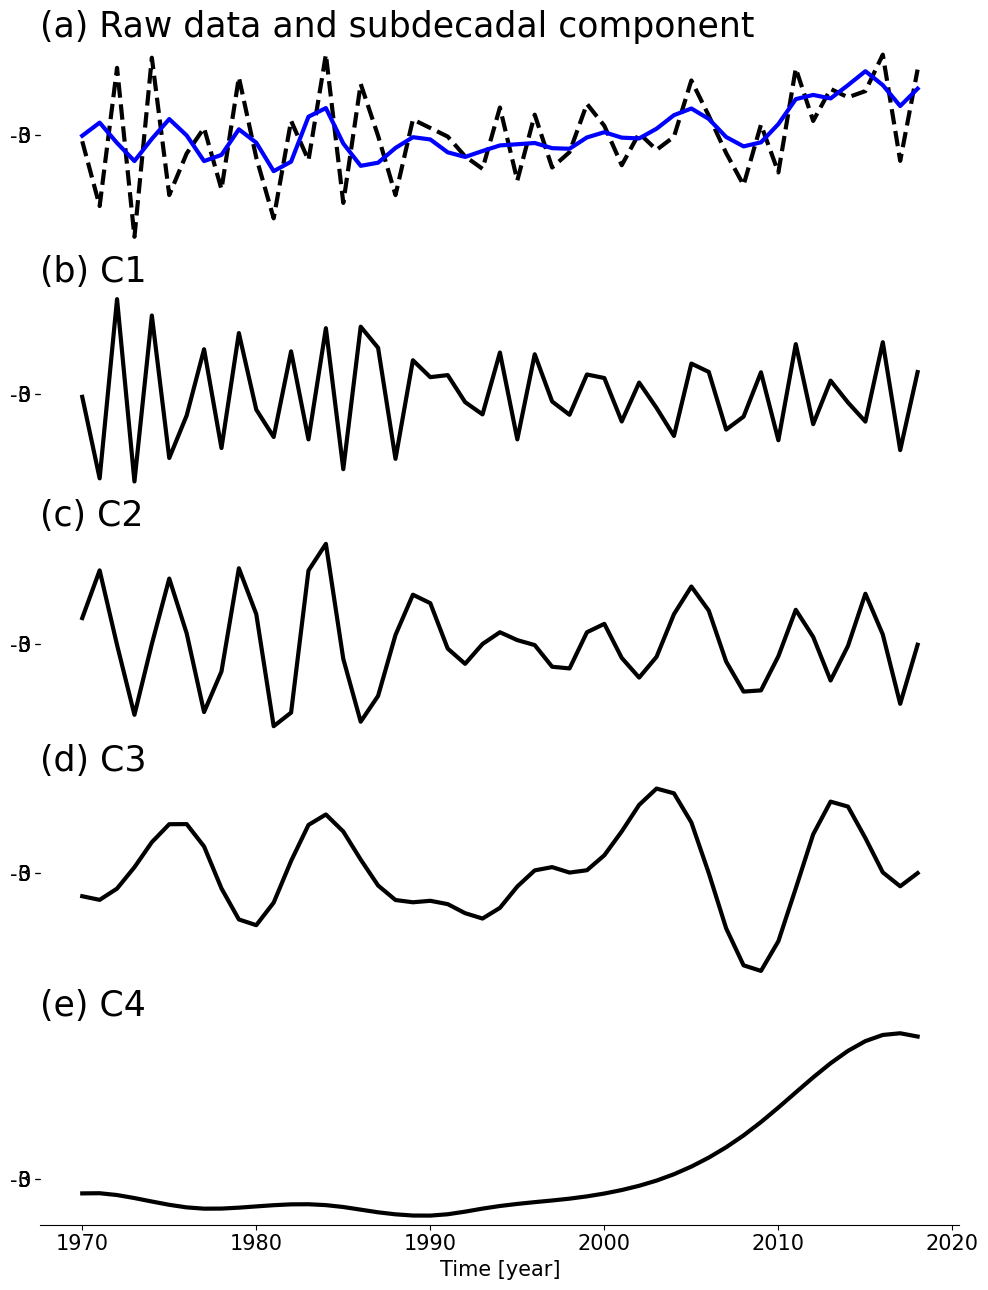

In [7]:
import matplotlib.pyplot as plt
t = np.arange(1970,2019,1)
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 13),sharex=True)
plt.subplots_adjust(hspace=10,wspace =0.15)
y = [-3, 0, 3]
# y_tick_labels = np.arange(1,10,1)

fontsize = 25
#plot time signal:

axs[0].plot(t, assi[0,:], '--', color='black', linewidth=3, markersize=10, label = '')
axs[0].plot(t, assi[2,:]+assi[3,:]+assi[4,:], '-', color='blue', linewidth=3, markersize=10, label = '')
axs[0].set_title("(a) Raw data and subdecadal component  ", loc='left', fontsize=fontsize)
# axs[0].set_ylim(-0.05, 0.05)
# axs[0].set_xlabel("Time [year]", fontsize='15')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].tick_params(bottom = False)

axs[0].set_yticklabels(y)
axs[0].set_yticks(y)


axs[1].plot(t, assi[1,:], '-', color='black', linewidth=3, markersize=10, label = 'raw')
# axs[1].plot(t, hind[1,:], '--', color='black', linewidth=2, markersize=10)
axs[1].set_title("(b) C1 ", loc='left', fontsize=fontsize)
# axs[1].set_ylim(-10, 10)   
axs[1].spines['left'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].set_yticklabels(y)
axs[1].set_yticks(y)
axs[1].tick_params(bottom = False)

# axs[0].set_yticklabels(y_tick_labels, fontsize = 30)

axs[2].plot(t, assi[2,:], '-', color='black', linewidth=3, markersize=10, label = 'raw')
# axs[2].plot(t, hind[2,:], '--', color='blue', linewidth=2, markersize=10)
axs[2].set_title("(c) C2 ", loc='left', fontsize=fontsize)
axs[2].spines['left'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
# axs[2].set_ylim(-0.3, 0.3)   
axs[2].set_yticklabels(y)
axs[2].set_yticks(y)
axs[2].tick_params(bottom = False)

axs[3].plot(t, assi[3,:], '-', color='black', linewidth=3, markersize=10, label = 'raw')
# axs[3].plot(t, hind[3,:], '--', color='black', linewidth=2, markersize=10, label = 'raw')
axs[3].set_title("(d) C3 ", loc='left', fontsize=fontsize)
axs[3].spines['left'].set_visible(False)
axs[3].spines['top'].set_visible(False)
axs[3].spines['right'].set_visible(False)
axs[3].spines['bottom'].set_visible(False)
# axs[3].set_ylim(-0.3, 0.3)   
axs[3].set_yticklabels(y)
axs[3].set_yticks(y)
axs[3].tick_params(bottom = False)



axs[4].plot(t, assi[4,:], '-', color='black', linewidth=3, markersize=10, label = 'raw')
# axs[4].plot(t, hind[4,:], '--', color='black', linewidth=2, markersize=10)
axs[4].set_title("(e) C4 ", loc='left', fontsize=fontsize)
# axs[4].set_ylim(-0.05, 0.05)
# axs[4].set_yticklabels([-15,0,15])
axs[4].set_yticklabels(y)
axs[4].set_yticks(y)

axs[4].set_xlabel("Time [year]", fontsize='15')
axs[4].spines['top'].set_visible(False)
axs[4].spines['right'].set_visible(False)
axs[4].spines['left'].set_visible(False)


axs[0].tick_params(axis='both', labelsize=15)
axs[1].tick_params(axis='both', labelsize=15)
axs[2].tick_params(axis='both', labelsize=15)
axs[3].tick_params(axis='both', labelsize=15)
axs[4].tick_params(axis='both', labelsize=15)


plt.tight_layout(h_pad=0.5, w_pad=None)

# fig.savefig('/work/uo1075/u241321/results/s5_tendency.pdf',bbox_inches='tight')

plt.show()

In [17]:
# lead-lag correlation
from scipy.stats import pearsonr
import numpy as np

# lead lag pearson correlation, negative values indicate data1 leads data2, n is the lead lag step
# the time length for correlation is sample-n; for example, for 50 years sample,
# if 10 yrs leadlag is choosen, the time length is 40 yrs

def leadlagcor(data1,data2,n):
    a=-n
    b=-a
    c=b*2+1
    x=np.arange(-n,n+1,1)
    r=np.zeros((c,1))
    p=np.zeros((c,1))
    begin=x[c-1]
    end=len(data1)-x[c-1]
    
    for i in range(c):
        if i<=(b):
            r[n-i],p[n-i]=pearsonr(data1[:end], data2[i:end+i])
        else:
            r[i],p[i]=pearsonr(data1[x[i]:end+x[i]], data2[:end])
    return r

/tmp/ipykernel_4007757/2342207663.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, y1, '-', linestyle='dashed',color='black', linewidth=2, markersize=10, label = 'raw')


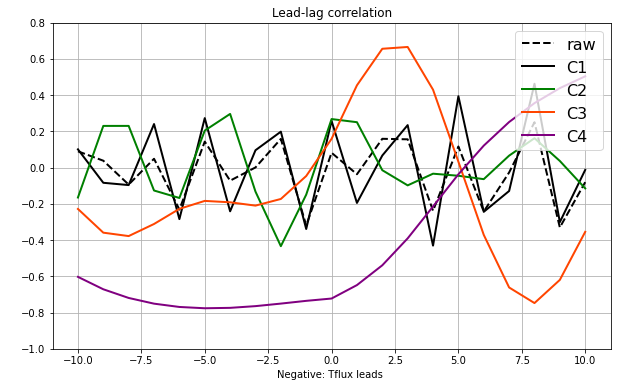

In [18]:
# 

n=10
corr = np.zeros((5,2*n+1))

for i in range(5):
    corr[i,:]=leadlagcor(hind[i,:],assi[i,:],n)[:,0]
        

x = np.arange(-10,11)
y1 = corr[0,:]
y2 = corr[1,:]
y3 = corr[2,:]
y4 = corr[3,:]
y5 = corr[4,:]

fig, ax = plt.subplots(figsize = [10,6])

ax.plot(x, y1, '-', linestyle='dashed',color='black', linewidth=2, markersize=10, label = 'raw')
ax.plot(x, y2, '-',  color='black', linewidth=2, markersize=10, label = 'C1')
ax.plot(x, y3, 'g-', linewidth=2, markersize=10, label = 'C2')
ax.plot(x, y4, '-', color='orangered', linewidth=2, markersize=10, label = 'C3')
ax.plot(x, y5, '-', color='purple', linewidth=2, markersize=10, label = 'C4')
# ax.axhline(0.277, linewidth=1, color='blue', linestyle= 'dashed')
# ax.axhline(-0.277, linewidth=1, color='blue', linestyle= 'dashed')


# ax.scatter(x, y1, 'o-', s=[1,2,3,2,4,3,2,2,2,1], linestyle='dashed', color='blue',label = 'raw_dtrend')
# ax.scatter(x, y1,  marksize[0,:],color='black')
# ax.scatter(x, y2,  marksize[1,:],color='green')
# ax.scatter(x, y3,  marksize[2,:],color='orangered')
# ax.scatter(x, y4,  marksize[3,:],color='purple')


ax.set(xlabel='Negative: Tflux leads ', ylabel=' ',
       title='Lead-lag correlation')
ax.set_ylim(-1, 0.8)
ax.grid()
ax.legend(loc='upper right', fontsize='16')
# ax.annotate('5%', fontsize='16',
#             xy=(80, 150), xycoords='figure points')

plt.rcParams["font.size"] = "15"
plt.show()
# fig.savefig('/work/uo1075/u241321/results/acc_ly_ave_comparison1_dt.pdf')    

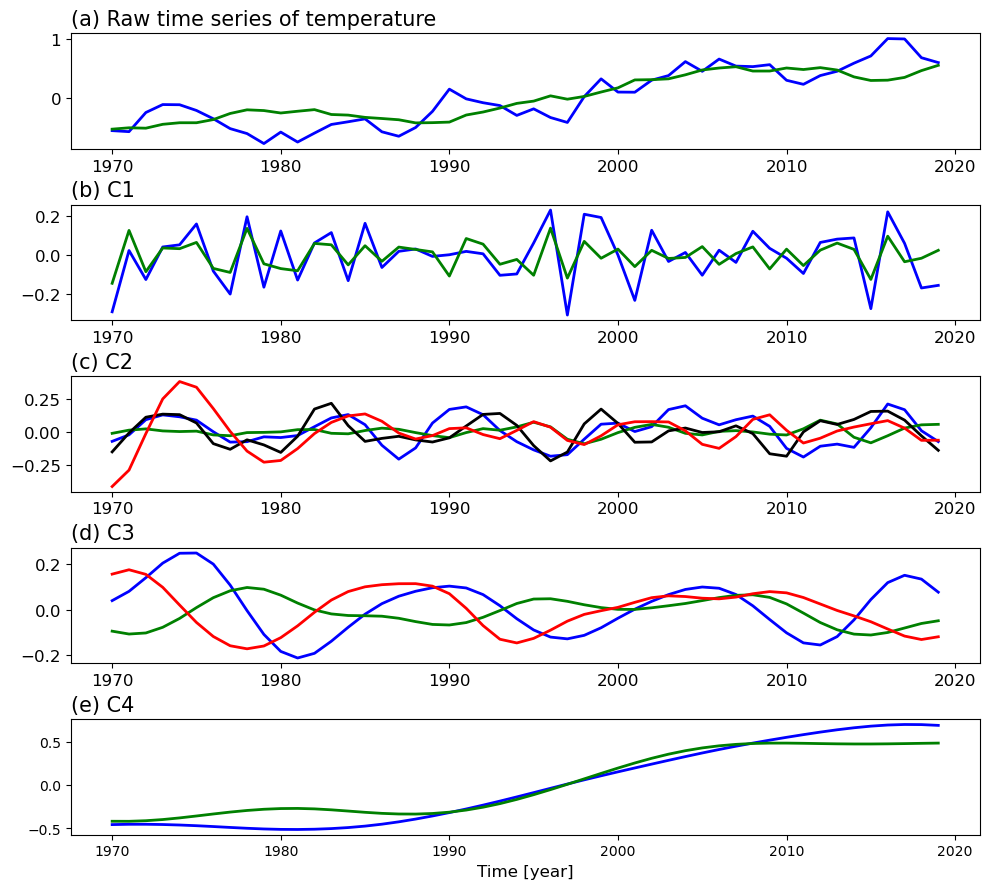

In [20]:
import matplotlib.pyplot as plt
t = np.arange(1970,2020,1)
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 9))
fontsize = 15
#plot time signal:
axs[0].set_title("(a) Raw time series of temperature ", loc='left', fontsize=fontsize)
axs[0].plot(t, assi[0,:], 'b', linewidth=2)
axs[0].plot(t, hind[0,:], '-', color='green', linewidth=2, markersize=10, label = 'Raw')

# axs[0].set_xticklabels([])
plt.title('(a)', loc='left', fontsize=fontsize)

axs[1].plot(t, assi[1,:], '-', color='blue', linewidth=2, markersize=10, label = 'raw')
axs[1].plot(t, hind[1,:], '-', color='green', linewidth=2, markersize=10)
axs[1].set_title("(b) C1", loc='left', fontsize=fontsize)
# axs[1].set_ylim(-0.05, 0.05)   

axs[2].plot(t, assi[2,:], '-', color='blue', linewidth=2, markersize=10, label = 'raw')
axs[2].plot(t, hind[2,:], '-', color='green', linewidth=2, markersize=10)
axs[2].plot(t, nao[2,:]/10., '-', color='black', linewidth=2, markersize=10)
axs[2].plot(t, spg[2,:]*10., '-', color='red', linewidth=2, markersize=10)
axs[2].set_title("(c) C2", loc='left', fontsize=fontsize)

axs[3].plot(t, assi[3,:], '-', color='blue', linewidth=2, markersize=10, label = 'raw')
axs[3].plot(t, hind[3,:], '-', color='green', linewidth=2, markersize=10)
axs[3].plot(t, s_assi[3,:]*10, '-', color='red', linewidth=2, markersize=10)

axs[3].set_title("(d) C3", loc='left', fontsize=fontsize)

axs[4].plot(t, assi[4,:], '-', color='blue', linewidth=2, markersize=10, label = 'raw')
axs[4].plot(t, hind[4,:], '-', color='green', linewidth=2, markersize=10)
axs[4].set_title("(e) C4", loc='left', fontsize=fontsize)
# axs[4].set_ylim(-0.05, 0.05)

axs[4].set_xlabel("Time [year]", fontsize='12')

axs[0].tick_params(axis='both', labelsize=12)
axs[1].tick_params(axis='both', labelsize=12)
axs[2].tick_params(axis='both', labelsize=12)
axs[3].tick_params(axis='both', labelsize=12)



# axs[6].set_ylim(-0.05, 0.05)
plt.tight_layout(h_pad=0.5, w_pad=None)

fig.savefig('/work/uo1075/u241321/results/results.pdf',bbox_inches='tight')

plt.show()

In [10]:
np.corrcoef(assi[2,:], assi1[2,:])[0,1]

0.49558871813322086

In [11]:
np.corrcoef(assi[3,:], assi1[3,:])[0,1]

0.7386294864416603

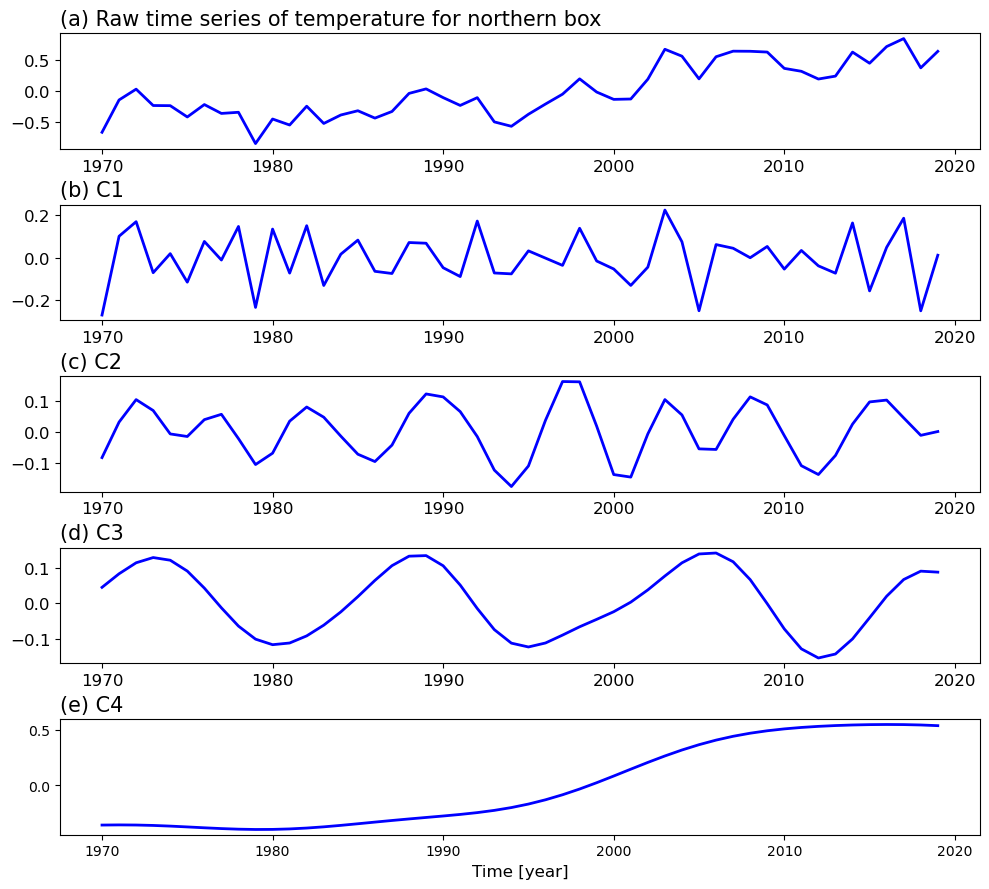

In [9]:
import matplotlib.pyplot as plt
t = np.arange(1970,2020,1)
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 9))
fontsize = 15
#plot time signal:
axs[0].set_title("(a) Raw time series of temperature for northern box", loc='left', fontsize=fontsize)
axs[0].plot(t, assi1[0,:], 'b', linewidth=2)
# axs[0].plot(t, hind[0,:], '-', color='green', linewidth=2, markersize=10, label = 'Raw')

# axs[0].set_xticklabels([])
plt.title('(a)', loc='left', fontsize=fontsize)

axs[1].plot(t, assi1[1,:], '-', color='blue', linewidth=2, markersize=10, label = 'raw')
# axs[1].plot(t, hind[1,:], '-', color='green', linewidth=2, markersize=10)
axs[1].set_title("(b) C1", loc='left', fontsize=fontsize)
# axs[1].set_ylim(-0.05, 0.05)   

axs[2].plot(t, assi1[2,:], '-', color='blue', linewidth=2, markersize=10, label = 'raw')
# axs[2].plot(t, hind[2,:], '-', color='green', linewidth=2, markersize=10)
axs[2].set_title("(c) C2", loc='left', fontsize=fontsize)

axs[3].plot(t, assi1[3,:], '-', color='blue', linewidth=2, markersize=10, label = 'raw')
# axs[3].plot(t, hind[3,:], '-', color='green', linewidth=2, markersize=10)
axs[3].set_title("(d) C3", loc='left', fontsize=fontsize)

axs[4].plot(t, assi1[4,:], '-', color='blue', linewidth=2, markersize=10, label = 'raw')
# axs[4].plot(t, hind[4,:], '-', color='green', linewidth=2, markersize=10)
axs[4].set_title("(e) C4", loc='left', fontsize=fontsize)
# axs[4].set_ylim(-0.05, 0.05)

axs[4].set_xlabel("Time [year]", fontsize='12')

axs[0].tick_params(axis='both', labelsize=12)
axs[1].tick_params(axis='both', labelsize=12)
axs[2].tick_params(axis='both', labelsize=12)
axs[3].tick_params(axis='both', labelsize=12)



# axs[6].set_ylim(-0.05, 0.05)
plt.tight_layout(h_pad=0.5, w_pad=None)

# fig.savefig('/work/uo1075/u241321/results/results.pdf',bbox_inches='tight')

plt.show()

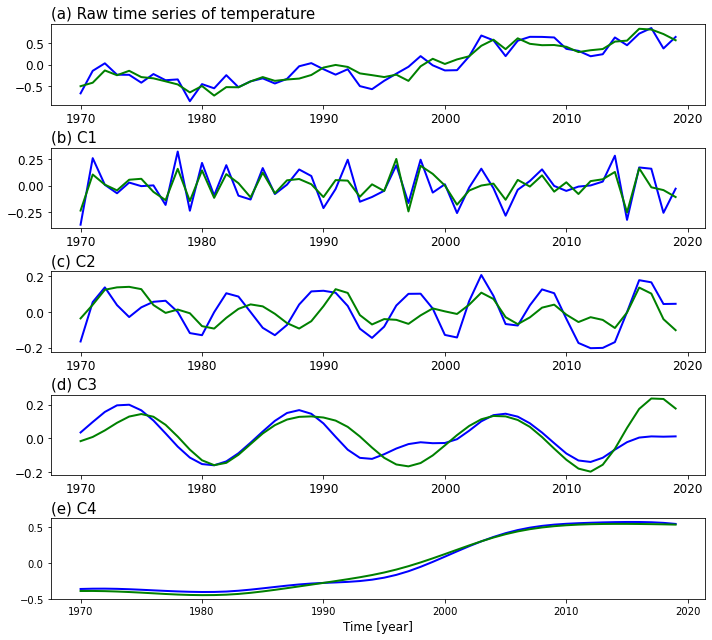

In [12]:
import matplotlib.pyplot as plt
t = np.arange(1970,2020,1)
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 9))
fontsize = 15
#plot time signal:
axs[0].set_title("(a) Raw time series of temperature ", loc='left', fontsize=fontsize)
axs[0].plot(t, assi1[0,:], 'b', linewidth=2)
axs[0].plot(t, assi[0,:], '-', color='green', linewidth=2, markersize=10, label = 'Raw')

# axs[0].set_xticklabels([])
plt.title('(a)', loc='left', fontsize=fontsize)

axs[1].plot(t, assi1[1,:], '-', color='blue', linewidth=2, markersize=10, label = 'raw')
axs[1].plot(t, assi[1,:], '-', color='green', linewidth=2, markersize=10)
axs[1].set_title("(b) C1", loc='left', fontsize=fontsize)
# axs[1].set_ylim(-0.05, 0.05)   

axs[2].plot(t, assi1[2,:], '-', color='blue', linewidth=2, markersize=10, label = 'raw')
axs[2].plot(t, assi[2,:], '-', color='green', linewidth=2, markersize=10)



axs[2].set_title("(c) C2", loc='left', fontsize=fontsize)

axs[3].plot(t, assi1[3,:], '-', color='blue', linewidth=2, markersize=10, label = 'raw')
axs[3].plot(t, assi[3,:], '-', color='green', linewidth=2, markersize=10)
axs[3].set_title("(d) C3", loc='left', fontsize=fontsize)

axs[4].plot(t, assi1[4,:], '-', color='blue', linewidth=2, markersize=10, label = 'raw')
axs[4].plot(t, assi[4,:], '-', color='green', linewidth=2, markersize=10)
axs[4].set_title("(e) C4", loc='left', fontsize=fontsize)
# axs[4].set_ylim(-0.05, 0.05)

axs[4].set_xlabel("Time [year]", fontsize='12')

axs[0].tick_params(axis='both', labelsize=12)
axs[1].tick_params(axis='both', labelsize=12)
axs[2].tick_params(axis='both', labelsize=12)
axs[3].tick_params(axis='both', labelsize=12)



# axs[6].set_ylim(-0.05, 0.05)
plt.tight_layout(h_pad=0.5, w_pad=None)

# fig.savefig('/work/uo1075/u241321/results/results.pdf',bbox_inches='tight')

plt.show()